# Stohastično iskanje neusmerjenih enocikličnih grafov višjih redov

In [99]:
import networkx as nx
import random
from itertools import product
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [98]:
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v toarray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(ev, np.round(ev), atol=1e-10) for ev in eigenvalues)  # Numerično računanje

In [150]:
def generate_random_graphs_with_one_cycle(n, num_samples):
    graphs = []
    
    while len(graphs) < num_samples:
        k = random.randint(3, n)
    
        cycle_graph = nx.cycle_graph(k)
        remaining_nodes = list(range(k, n))
        
        full_graph = cycle_graph.copy()
        attached_nodes = set(range(k))  
        for node in remaining_nodes:
            parent = random.choice(list(attached_nodes)) # Izberemo naključno vozlišče, ki je že del grafa, kot začetnika
            full_graph.add_edge(parent, node)
            attached_nodes.add(node)  # Dodamo novo vozlišče v množico priključenih
        
        # Pogoji
        if len(list(nx.cycle_basis(full_graph))) == 1:
            #is_isomorphic = any(nx.is_isomorphic(full_graph, g) for g in graphs)
            #if not is_isomorphic:
            graphs.append(full_graph)
    
    return graphs

### Primer za n=20, število grafov=10

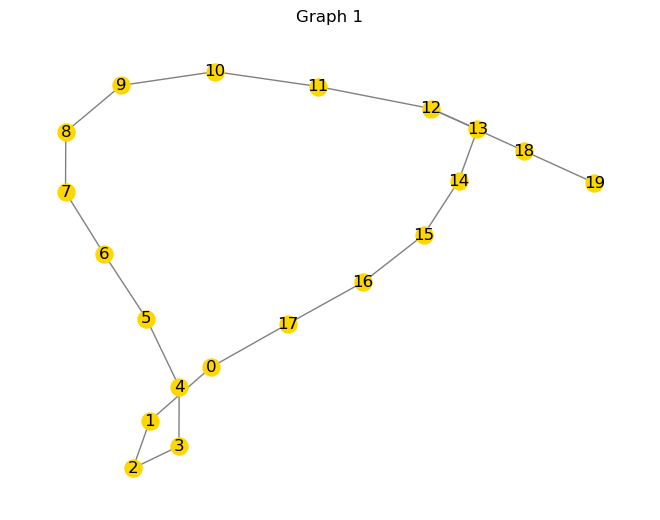

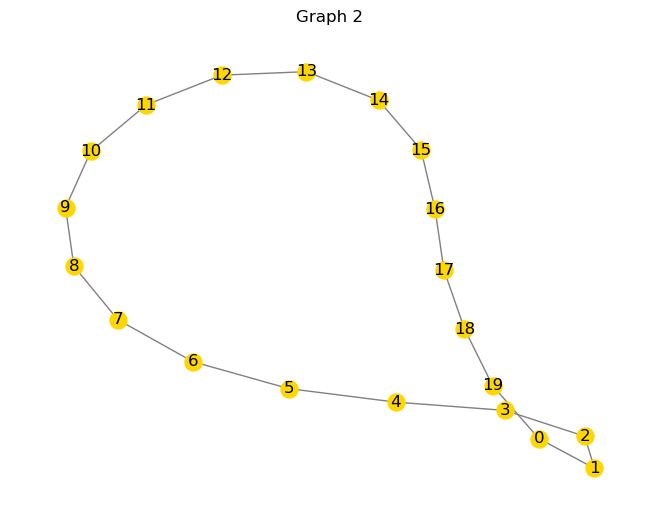

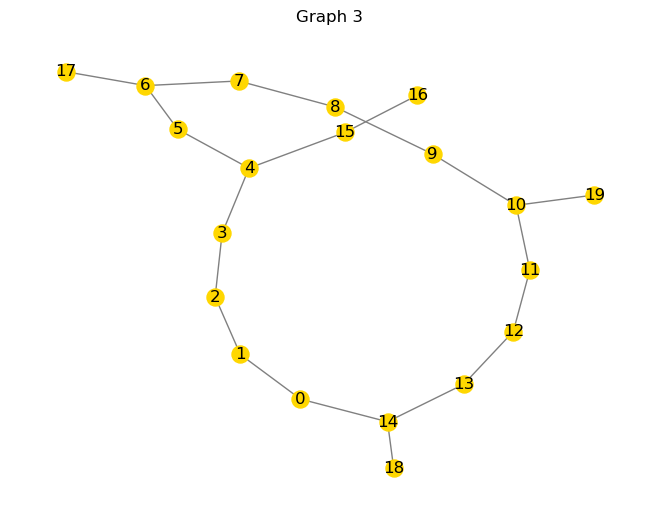

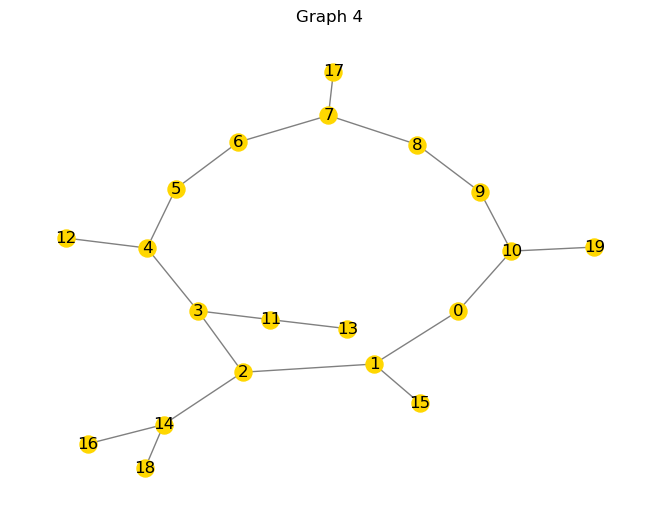

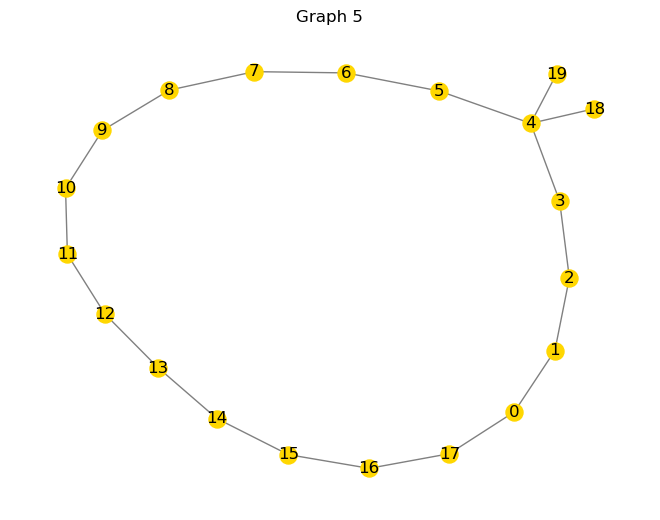

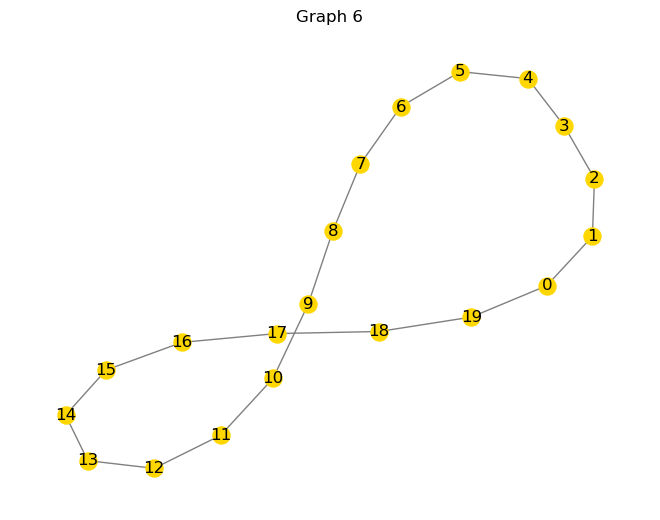

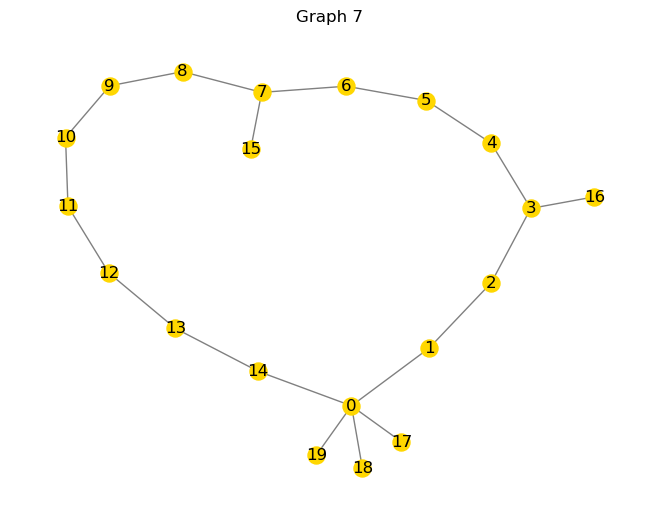

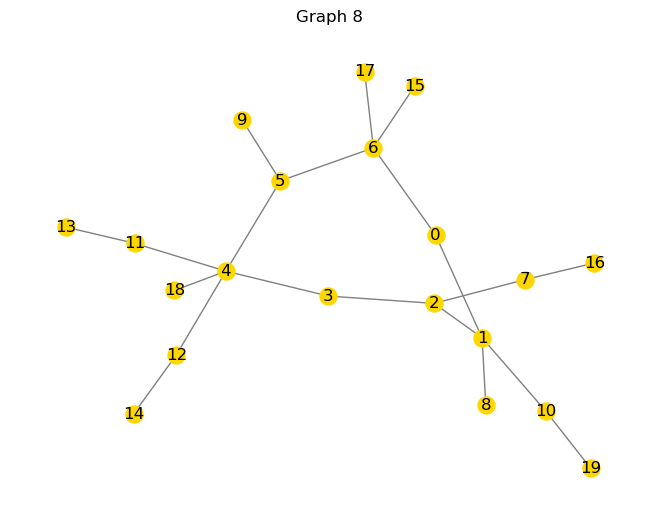

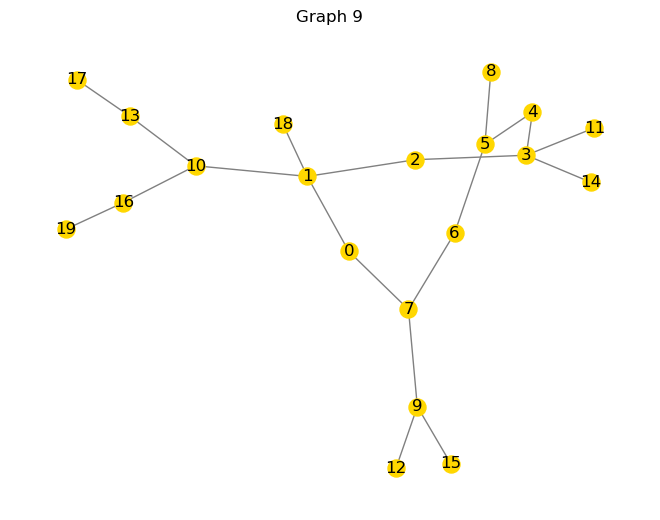

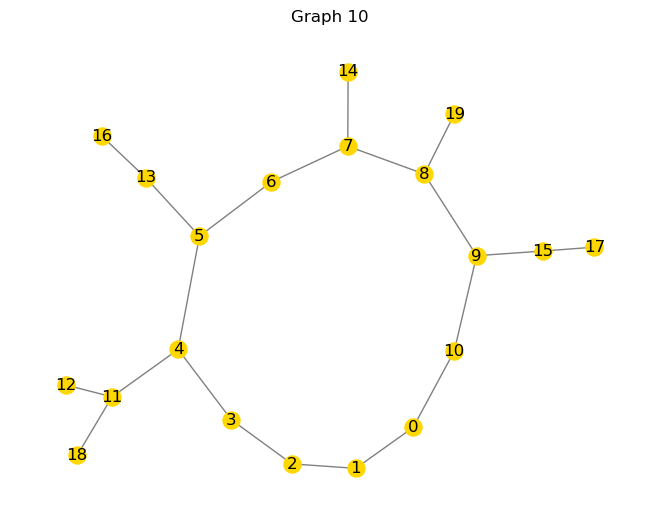

In [151]:
n = 20
num_samples = 10
graphs_stohastic = generate_random_graphs_with_one_cycle(n, num_samples)


for i, graph in enumerate(graphs_stohastic):
    plt.figure()
    nx.draw(graph, with_labels = True, node_color = 'gold' , node_size = 150, edge_color = 'gray')
    plt.title(f"Graph {i + 1}")
    plt.show()

In [158]:
def unicyclic_laplacian_integer_graph_stohastic(n, num_samples):
    graphs_with_one_cycle = generate_random_graphs_with_one_cycle(n, num_samples)

    laplacian_graphs = []
    
    for i, graph in enumerate(graphs_with_one_cycle):
        if is_laplacian_integer_graph(graph):
            laplacian_graphs.append(graph)

    print(f"Total graphs with one cycle for n = {n}: {len(graphs_with_one_cycle)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_graphs)}")

    # Prikaz
    for i, graph in enumerate(laplacian_graphs):
        print(f"Graph {i + 1}:")
        print("Edges:", graph.edges())
        plt.figure()
        pos = nx.spring_layout(graph) 
        nx.draw(graph, pos, with_labels = True, node_color = 'gold', node_size=750, edge_color = 'gray')
        plt.title(f"Graph {i + 1}")
        plt.show()

    return laplacian_graphs    

In [ ]:
i = 0
for n in range(10, 51):
    laplace = unicyclic_laplacian_integer_graph_stohastic(n, 100)
    if len(laplace) != 0:
        print("LAPLACE FOUND")
    i += len(laplace)
print()    
print(f"Number of Laplacian integer graphs found: {i}")
    

Total graphs with one cycle for n = 10: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 11: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 12: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 13: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 14: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 15: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 16: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 17: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 18: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 19: 1000
Total Laplacian integer graphs found: 0
Total graphs with one cycle for n = 20: 1000
Total Laplacian integer graphs found: 0

Number of Laplacian integer graphs found: 0
